<a href="https://colab.research.google.com/github/alwalid54321/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#image classifcation

In [9]:
!pip install pyarrow tensorflow scikeras

In [3]:
import pandas as pd
import numpy as np
import requests
import tarfile
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasClassifier
from PIL import Image
import io



In [10]:
# # Load the dataset
# splits = {
#     'train': 'plain_text/train-00000-of-00001.parquet',
#     'test': 'plain_text/test-00000-of-00001.parquet'
# }

# train_df = pd.read_parquet("https://huggingface.co/datasets/uoft-cs/cifar10/resolve/main/" + splits["train"])
# test_df = pd.read_parquet("https://huggingface.co/datasets/uoft-cs/cifar10/resolve/main/" + splits["test"])

# # Inspect the DataFrame structure
# print(train_df.columns)
# print(train_df.head())


In [4]:

# Download the CIFAR-100 dataset
url = "https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz"
response = requests.get(url)

# Save the downloaded file
with open("cifar-100-python.tar.gz", "wb") as f:
    f.write(response.content)

# Extract the tar.gz file
with tarfile.open("cifar-100-python.tar.gz") as tar:
    tar.extractall()

# Load CIFAR-100 data
def load_cifar100():
    with open('./cifar-100-python/train', 'rb') as f:
        train_data = pickle.load(f, encoding='bytes')

    with open('./cifar-100-python/test', 'rb') as f:
        test_data = pickle.load(f, encoding='bytes')

    return train_data, test_data

# Preprocess the dataset
def preprocess_data(data, num_classes=100):
    images = data[b'data']
    labels = np.array(data[b'fine_labels'])

    # Reshape and normalize images
    images = images.reshape((-1, 3, 32, 32)).transpose(0, 2, 3, 1).astype(np.float32) / 255.0

    # Convert labels to one-hot encoding
    labels = to_categorical(labels, num_classes=num_classes)

    return images, labels

# Data augmentation
def data_augmentation():
    return ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        zoom_range=0.1,
        shear_range=0.1
    )

# Main function
def main():
    # Load the data
    train_data, test_data = load_cifar100()

    # Preprocess the data
    x_train, y_train = preprocess_data(train_data)
    x_test, y_test = preprocess_data(test_data)

    # Split the training data into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

    # Create data augmentation generator
    datagen = data_augmentation()
    datagen.fit(x_train)

    # Verify the data shapes
    print("Training data shape:", x_train.shape, y_train.shape)
    print("Validation data shape:", x_val.shape, y_val.shape)
    print("Test data shape:", x_test.shape, y_test.shape)

    return x_train, y_train, x_val, y_val, x_test, y_test, datagen

# Execute the main function
if __name__ == "__main__":
    x_train, y_train, x_val, y_val, x_test, y_test, datagen = main()


Training data shape: (40000, 32, 32, 3) (40000, 100)
Validation data shape: (10000, 32, 32, 3) (10000, 100)
Test data shape: (10000, 32, 32, 3) (10000, 100)


Displaying 10 sample images from the training set:


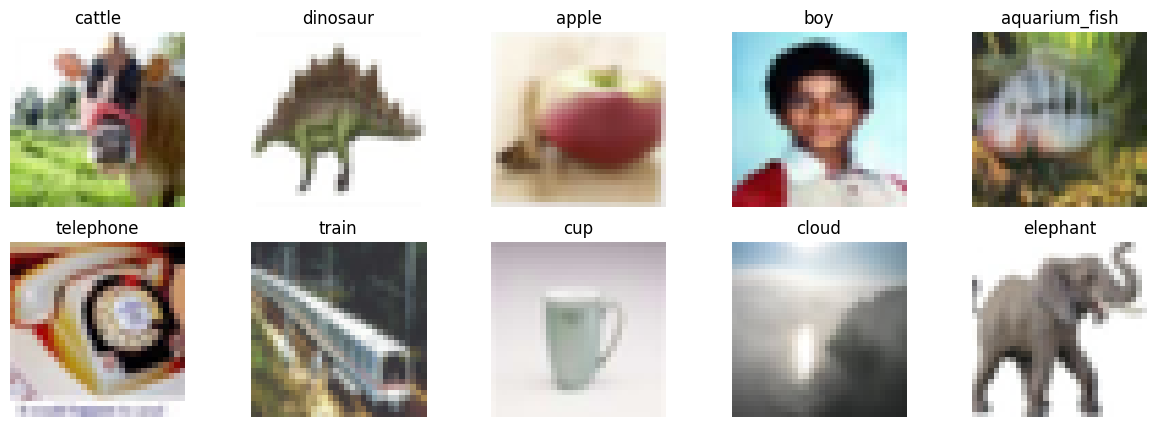

Training data shape: (50000, 32, 32, 3) (50000, 100)
Test data shape: (10000, 32, 32, 3) (10000, 100)


In [5]:
import matplotlib.pyplot as plt

# Function to display a grid of images
def plot_samples(images, labels, class_names, num_samples=10):
    plt.figure(figsize=(15, 5))

    for i in range(num_samples):
        plt.subplot(2, num_samples//2, i+1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i]])
        plt.axis('off')

    plt.show()

# Load CIFAR-100 metadata for class names
def load_class_names():
    with open('./cifar-100-python/meta', 'rb') as f:
        meta_data = pickle.load(f, encoding='bytes')
        class_names = meta_data[b'fine_label_names']
        class_names = [name.decode('utf-8') for name in class_names]
    return class_names

# Main function
def main():
    # Load the data
    train_data, test_data = load_cifar100()

    # Preprocess the data
    x_train, y_train = preprocess_data(train_data)
    x_test, y_test = preprocess_data(test_data)

    # Load class names
    class_names = load_class_names()

    # Convert one-hot labels back to integers for visualization
    y_train_labels = np.argmax(y_train, axis=1)

    # Plot some training samples
    print("Displaying 10 sample images from the training set:")
    plot_samples(x_train, y_train_labels, class_names)

    # Verify the data shapes
    print("Training data shape:", x_train.shape, y_train.shape)
    print("Test data shape:", x_test.shape, y_test.shape)

    return x_train, y_train, x_test, y_test

# Run the main function
if __name__ == "__main__":
    x_train, y_train, x_test, y_test = main()



In [ ]:
# def preprocess(df, image_column, label_column):
#     images = []
#     for img_bytes in df[image_column]:
#         # Convert binary data to a PIL image
#         img = Image.open(io.BytesIO(img_bytes['bytes'])).convert('RGB')
#         img = img.resize((32, 32))  # Resize to match the input shape expected by the model
#         img_array = np.array(img)
#         images.append(img_array)

#     images = np.array(images)

#     # Convert labels to categorical format
#     labels = np.array(df[label_column])
#     labels = to_categorical(labels, num_classes=10)

#     # Normalize images
#     images = images.astype('float32') / 255.0

#     return images, labels

# # Call the preprocess function with actual column names
# x_train, y_train = preprocess(train_df, 'img', 'label')
# x_test, y_test = preprocess(test_df, 'img', 'label')

# # Verify the data shape
# print(x_train.shape, y_train.shape)
# print(x_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from sklearn.model_selection import KFold
import numpy as np

# Data Preprocessing
def preprocess_data(x):
    x = x.astype('float32') / 255.0
    mean = np.mean(x, axis=(0, 1, 2))
    std = np.std(x, axis=(0, 1, 2))
    x = (x - mean) / (std + 1e-7)
    return x

x_train = preprocess_data(x_train)
x_test = preprocess_data(x_test)

# Advanced Data Augmentation
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    channel_shift_range=0.2,
    brightness_range=[0.8, 1.2]
)

# Cosine Annealing Learning Rate Schedule
def cosine_annealing(epoch, total_epochs, initial_lr):
    return initial_lr * (1 + np.cos(np.pi * epoch / total_epochs)) / 2

# EfficientNet Model
def build_efficientnet_model(input_shape=(32, 32, 3), num_classes=10):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=base_model.input, outputs=outputs)
    return model

# Vision Transformer Model
def build_vit_model(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.LayerNormalization()(x)
    x = layers.MultiHeadAttention(num_heads=4, key_dim=32)(x, x)
    x = layers.LayerNormalization()(x)
    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.LayerNormalization()(x)
    x = layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    x = layers.LayerNormalization()(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Custom CNN Model
def build_custom_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.3),

        layers.Conv2D(128, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.4),

        layers.Conv2D(256, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(256, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.5),

        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Ensemble Model
def build_ensemble_model(models, input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    outputs = [model(inputs) for model in models]
    outputs = layers.Average()(outputs)
    ensemble_model = models.Model(inputs=inputs, outputs=outputs)
    return ensemble_model

# Compile and train a single model
def compile_and_train_model(model, x_train, y_train, x_val, y_val, epochs=50, batch_size=64):
    initial_lr = 0.001
    lr_schedule = LearningRateScheduler(lambda epoch: cosine_annealing(epoch, epochs, initial_lr))
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-6)

    model.compile(
        optimizer=Adam(learning_rate=initial_lr, clipnorm=1.0),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        data_gen.flow(x_train, y_train, batch_size=batch_size),
        epochs=epochs,
        validation_data=(x_val, y_val),
        callbacks=[lr_schedule, early_stopping, reduce_lr]
    )

    return model, history

# K-Fold Cross-Validation
def k_fold_cross_validation(build_model_func, x, y, n_splits=5):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(x, y)):
        print(f"Fold {fold + 1}/{n_splits}")
        x_train, x_val = x[train_idx], x[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = build_model_func()
        model, history = compile_and_train_model(model, x_train, y_train, x_val, y_val)

        score = model.evaluate(x_val, y_val)
        scores.append(score[1])
        print(f"Fold {fold + 1} accuracy: {score[1]}")

    print(f"Mean accuracy: {np.mean(scores)}")
    return scores

# Train individual models
efficientnet_model = build_efficientnet_model()
vit_model = build_vit_model()
custom_cnn_model = build_custom_cnn_model()

models = [efficientnet_model, vit_model, custom_cnn_model]
model_names = ['EfficientNet', 'Vision Transformer', 'Custom CNN']

for model, name in zip(models, model_names):
    print(f"Training {name}")
    scores = k_fold_cross_validation(lambda: model, x_train, y_train)

# Ensemble model
ensemble_model = build_ensemble_model(models)
ensemble_model.compile(optimizer=Adam(learning_rate=0.001, clipnorm=1.0),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train ensemble model
ensemble_history = ensemble_model.fit(
    data_gen.flow(x_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[
        EarlyStopping(patience=10, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-6),
        LearningRateScheduler(lambda epoch: cosine_annealing(epoch, 50, 0.001))
    ]
)

# Evaluate ensemble model
ensemble_score = ensemble_model.evaluate(x_test, y_test)
print(f"Ensemble model test accuracy: {ensemble_score[1]}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training EfficientNet
Fold 1/5
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 181s 221ms/step - accuracy: 0.3943 - loss: 7.8840 - val_accuracy: 0.4127 - val_loss: 2.1368 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 216ms/step - accuracy: 0.6330 - loss: 1.4067 - val_accuracy: 0.6870 - val_loss: 1.2360 - learning_rate: 9.9901e-04
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 216ms/step - accuracy: 0.6685 - loss: 1.2491 - val_accuracy: 0.7343 - val_loss: 1.0606 - learning_rate: 9.9606e-04
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 216ms/step - accuracy: 0.6957 - loss: 1.1720 - val_accuracy: 0.7712 - val_loss: 0.8948 - learning_rate: 9.9114e-04
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 216ms/step - accuracy: 0.7098 - loss: 1.1120 - val_accuracy: 0.7712 - val_loss: 0.9294 - learning_rate: 9.8429e-04
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 216ms/step - accuracy: 0.7278 - loss: 1.0502 - val_accuracy: 0.7749 - val_loss: 0.8460 - learning_rate: 9.7553e-04
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 216ms/step